# Wordcloud for MAU webapp

Join the strings about the attitude to agriecology to one, use stop words to exclude not significant words, and use wordcloud graph

In [10]:
import pandas as pd
import numpy as np
import re
import plotly.express as px
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)

df = pd.read_csv('data.csv',sep=';').dropna(how = 'all') # Base de datos consolidada (1er y 2do encuentro)
text = ' '.join(df['Relación con la agroecología']).lower()

In [30]:
new = re.sub('amos ', 'ar ', text)
text = new
new = re.sub('ales ', 'al ', text)
text = new
new = re.sub('ales ', 'al ', text)
text = new
new = re.sub('oles ', 'ol ', text)
text = new
new = re.sub('bles ', 'ble ', text)
text = new
new = re.sub('rtas', 'rta', text)
text = new
new = re.sub('ntas ', 'nta ', text)
text = new
new = re.sub('llas', 'lla ', text)
text = new
new = re.sub('ños ', 'ño ', text)
text = new
new = re.sub('ores ', 'or ', text)
text = new
new = re.sub('eres ', 'er ', text)
text = new
new = re.sub('cos ', 'co ', text)
text = new
new = re.sub('ces ', 'ce ', text)
text = new
new = re.sub('ces ', 'ce ', text)
text = new
new = re.sub('sos ', 'so ', text)
text = new
new = re.sub('idos ', 'ido ', text)
text = new
new = re.sub('idas ', 'ida ', text)
text = new
new = re.sub('ios', 'io', text)
text = new
new = re.sub('arias', 'ario', text)
text = new
new = re.sub('arias', 'ario', text)
text = new
new = re.sub('sques', 'sque', text)
text = new
new = re.sub('rtos', 'rto', text)
text = new
new = re.sub('pado', 'par', text)
text = new
new = re.sub('días', 'día', text)
text = new
new = re.sub('comunidades', 'comunidad', text)
text = new
new = re.sub('mezclados', 'mezclado', text)
text = new
new = re.sub('aprendizajes', 'aprendizaje', text)
text = new
new = re.sub('técnicas', 'técnico', text)
text = new
new = re.sub('amiges', 'amigo', text)
text = new
new = re.sub('regenerativas', 'regenerativo', text)
text = new
new = re.sub('productos', 'producto', text)
text = new
new = re.sub('plagas', 'plaga', text)
text = new
new = re.sub('ajar', 'ajo', text)
text = new
new = re.sub('bana', 'bano', text)
text = new
new = re.sub('aria', 'ario', text)
text = new
new = re.sub('duos', 'duo', text)
text = new
new = re.sub('años', 'año', text)
text = new
new = re.sub('cias', 'cia', text)
text = new
new = re.sub('tivos', 'tivo', text)
text = new
new = re.sub('arbol', 'árbol', text)
text = new
new = re.sub('gunos', 'guno', text)
text = new
new = re.sub('intos', 'into', text)
text = new
new = re.sub('esoro', 'esorar', text)
text = new

In [34]:
frequency = {}    
match_pattern= re.findall(r'[a-zóíéáúüôñàîïý]{3,20}', text)

for word in match_pattern:
    count = frequency.get(word,0)
    frequency[word] = count + 1

all_words = len(text.split())

frequency_list = frequency.keys()
freq_dic = []

exclusion_list = ['con','que','de','la','lo','una','uno','sin','etc','donde','info','hace','para','desde','soy','los','las','por','fue','fueron','algo','por','ser','mis','cada','era','ahí','fui','entre','esto','esta','así','mas','más','lxs','del'\
'tengo','través','san','vamos','angamos','del', 'par', 'fau', 'mst', 'nos', 'vez', 'unxs', 'cómo', 'como', 'hago', 'matta', 'usach', 'aucca', 'vamos','eres','par','mucho','todas','todos', 'domo','san','joaquin', 'estos','varios','varios','jgm'\
                'tres','dos','cuatro','luego','llevo','sobre','y','una', 'chica','chico','brasil','tenido']

for words in frequency_list:
        if words not in exclusion_list:    #review the exclusions
            freq_dic.append([words, frequency[words],round(100*frequency[words]/all_words,2)])
            
dff = pd.DataFrame(freq_dic, columns = ['word', 'ocurrence','share%'])
dff = dff.sort_values(by="ocurrence", ascending = False)

In [35]:
f = dff.set_index('word').reset_index().fillna(0)
f = f.sort_values(by = 'share%', ascending = False)

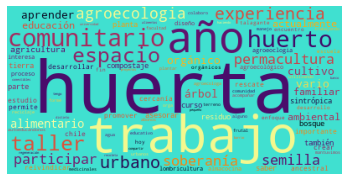

In [38]:
from wordcloud import WordCloud

d = {w: f for w, f in zip(f['word'],f['share%'])}

wordcloud = WordCloud(background_color='turquoise', colormap='inferno', prefer_horizontal=1)
wordcloud.generate_from_frequencies(frequencies=d)
plt.imshow(wordcloud)
plt.axis('off')
#plt.title(" Most frequent words in opened questions (Selection) \n Main goals | Member screening methods ",fontsize=12, y =1.07, wrap=True)
plt.show()

In [37]:
from IPython.core.display import display, HTML
display(HTML(
    '<style>'
        '#notebook { padding-top:0px !important; } ' 
        '.container { width:100% !important; } '
        '.end_space { min-height:0px !important; } '
    '</style>'
))